In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

### **Class Distribution - Original Dataset**

In [2]:

class_counts = {
    "Basal_Cell_Carcinoma": 514,
    "Actinic_Keratosis": 329,
    "squamous_cell_carcinoma": 197,
    "Melanoma": 1567,
    "lentigo_maligna": 98,
    "Nevus_Sebaceus": 72,
    "Pigmented_Benign_Keratosis": 1099,
    "Vascular_Lesion": 142,
    "blue_naevus": 100,
    "Melanocytic_Nevus": 7078,
    "Elastosis_Perforans_Serpiginosa": 73,
    "Dermatofibroma": 122,
    "seborrheic_keratosis": 80
}

In [3]:
rare_diseases = {"Elastosis_Perforans_Serpiginosa", 
                 "Nevus_Sebaceus", 
                 "blue_naevus", 
                 "lentigo_maligna"}

colors = ['red' if disease in rare_diseases else 'blue' for disease in class_counts.keys()]

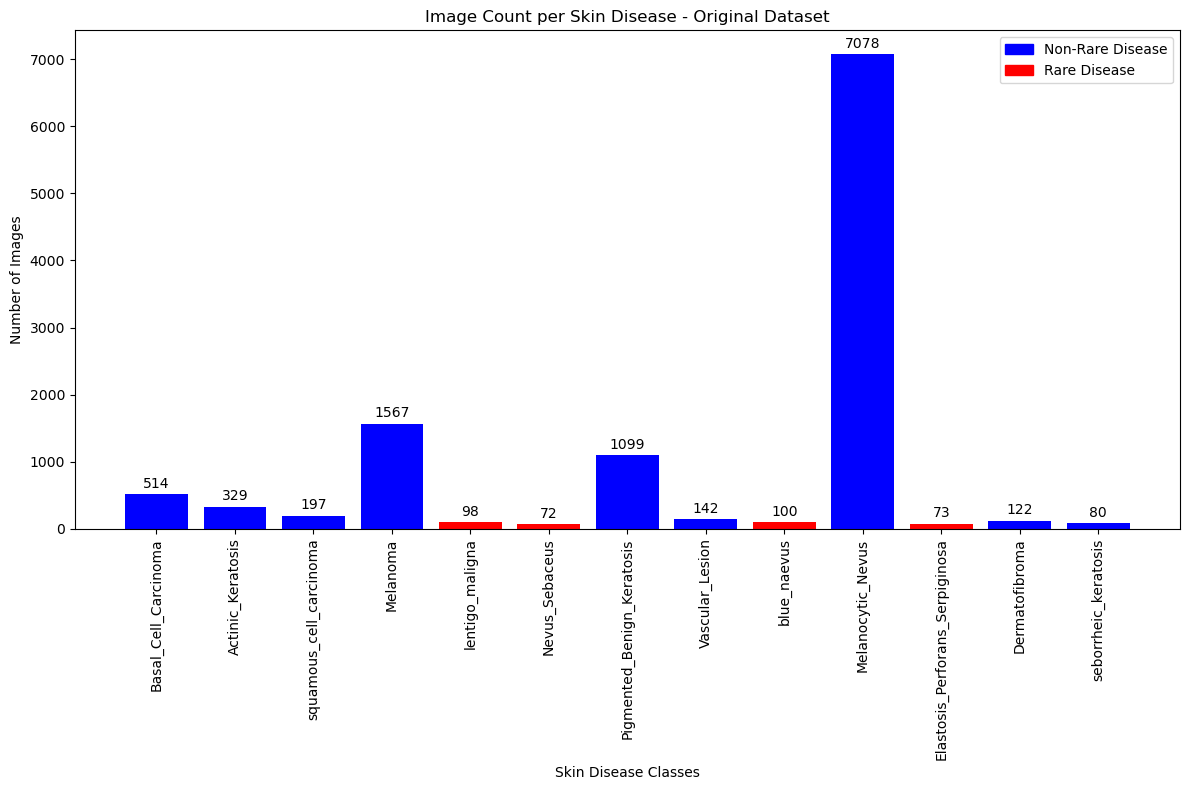

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(class_counts.keys(), class_counts.values(), color=colors)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 50, int(yval), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.xlabel("Skin Disease Classes")
plt.ylabel("Number of Images")
plt.title("Image Count per Skin Disease - Original Dataset")

# Add legend with dummy handles
import matplotlib.patches as mpatches
rare_patch = mpatches.Patch(color='red', label='Rare Disease')
non_rare_patch = mpatches.Patch(color='blue', label='Non-Rare Disease')
plt.legend(handles=[non_rare_patch, rare_patch], loc="upper right")

plt.tight_layout()
plt.show()

### **Augmented Dataset**

### **Class Distribution - Augmented Dataset**

In [5]:
class_counts = {
    "Actinic_Keratosis": 1539 ,
    "Basal_Cell_Carcinoma": 2285 ,
    "blue_naevus": 486 ,
    "Dermatofibroma": 591 ,
    "Elastosis_Perforans_Serpiginosa": 353 ,
    "lentigo_maligna": 473 ,
    "Melanocytic_Nevus": 9716 ,
    "Melanoma": 5417 ,
    "Nevus_Sebaceus": 353 ,
    "Pigmented_Benign_Keratosis": 4189 ,
    "seborrheic_keratosis": 393 ,
    "squamous_cell_carcinoma": 942 ,
    "Vascular_Lesion": 686 
}

In [6]:
rare_diseases = {"Elastosis_Perforans_Serpiginosa", "Nevus_Sebaceus", "blue_naevus", "lentigo_maligna"}

colors = ['red' if disease in rare_diseases else 'blue' for disease in class_counts.keys()]


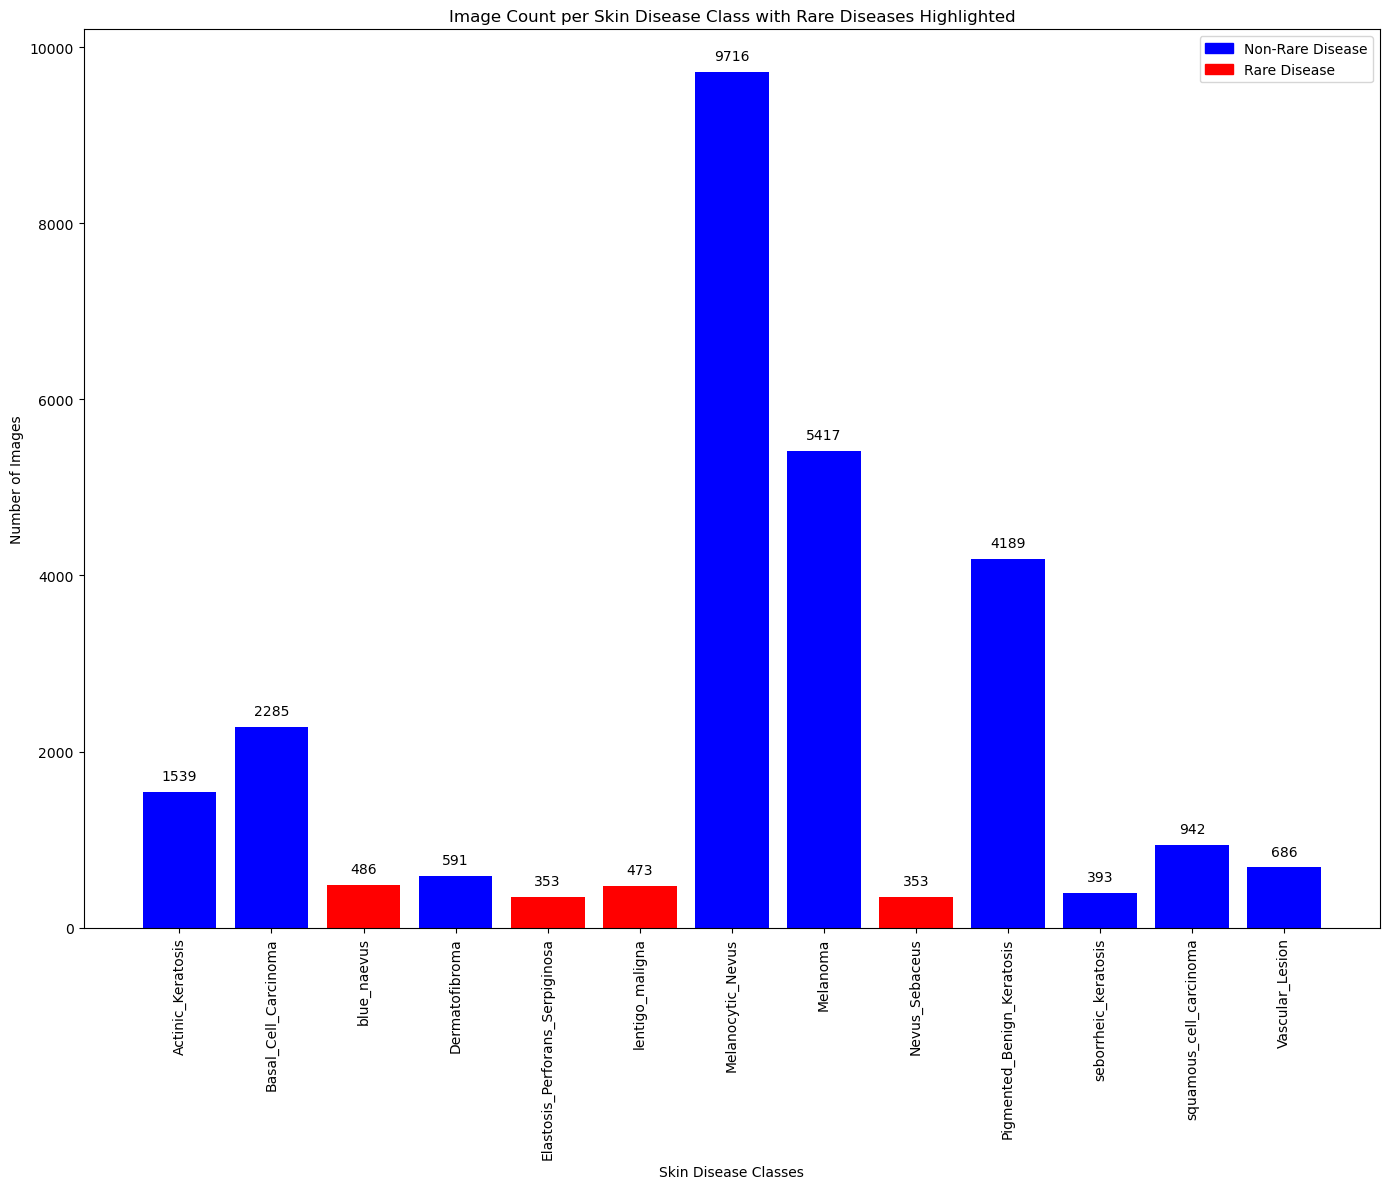

In [7]:
fig, ax = plt.subplots(figsize=(14, 12))
bars = ax.bar(class_counts.keys(), class_counts.values(), color=colors)
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 100, int(yval), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.xlabel("Skin Disease Classes")
plt.ylabel("Number of Images")
plt.title("Image Count per Skin Disease Class with Rare Diseases Highlighted")

rare_patch = mpatches.Patch(color='red', label='Rare Disease')
non_rare_patch = mpatches.Patch(color='blue', label='Non-Rare Disease')
plt.legend(handles=[non_rare_patch, rare_patch], loc="upper right")

plt.tight_layout()
plt.show()

### **Comparison of Original and Augmented Image Counts**

In [8]:
original_counts = {
    "Basal_Cell_Carcinoma": 514,
    "Actinic_Keratosis": 329,
    "squamous_cell_carcinoma": 197,
    "Melanoma": 1567,
    "lentigo_maligna": 98,
    "Nevus_Sebaceus": 72,
    "Pigmented_Benign_Keratosis": 1099,
    "Vascular_Lesion": 142,
    "blue_naevus": 100,
    "Melanocytic_Nevus": 7078,
    "Elastosis_Perforans_Serpiginosa": 73,
    "Dermatofibroma": 122,
    "seborrheic_keratosis": 80
}

augmented_counts = {
    
    "Basal_Cell_Carcinoma": 2285 ,
    "Actinic_Keratosis": 1539 ,
    "squamous_cell_carcinoma": 942 ,
    "Melanoma": 5417 ,
    "lentigo_maligna": 473 ,
    "Nevus_Sebaceus": 353 ,
    "Pigmented_Benign_Keratosis": 4189 ,
    "Vascular_Lesion": 686,
    "blue_naevus": 486 ,
    "Melanocytic_Nevus": 9716 ,
    "Elastosis_Perforans_Serpiginosa": 353 ,
    "Dermatofibroma": 591 ,
    "seborrheic_keratosis": 393 ,
}

In [9]:
increase_counts = {key: augmented_counts[key] - original_counts.get(key, 0) for key in augmented_counts.keys()}

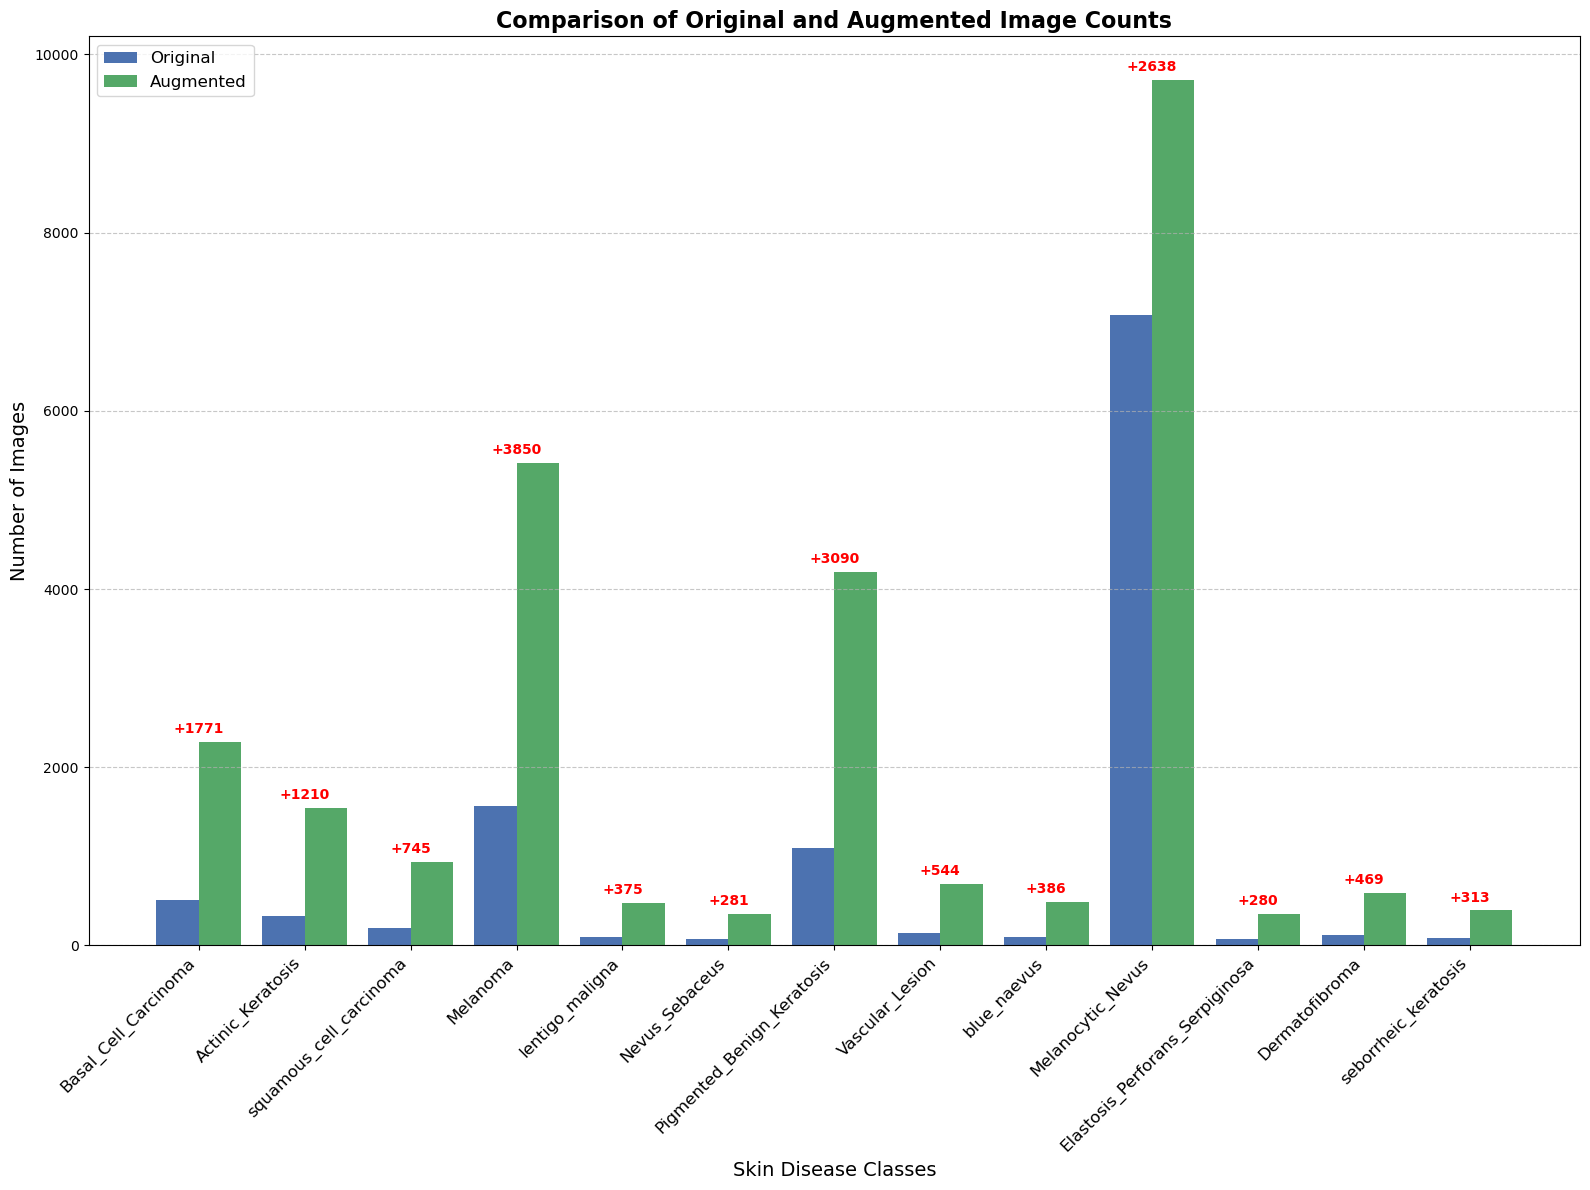

In [10]:
fig, ax = plt.subplots(figsize=(16, 12), dpi=100)
x = np.arange(len(increase_counts))
bar_width = 0.4

original_color = '#4c72b0'
augmented_color = '#55a868'

original_bars = ax.bar(x - bar_width / 2, original_counts.values(), bar_width, label="Original", color=original_color)
augmented_bars = ax.bar(x + bar_width / 2, augmented_counts.values(), bar_width, label="Augmented", color=augmented_color)

for i, (orig, aug) in enumerate(zip(original_counts.values(), augmented_counts.values())):
    increase = aug - orig
    ax.annotate(f"+{increase}", xy=(i, aug + 100), ha='center', color='red', fontweight='bold', fontsize=10)

ax.set_xticks(x)
ax.set_xticklabels(augmented_counts.keys(), rotation=45, ha='right', fontsize=12)
ax.set_xlabel("Skin Disease Classes", fontsize=14)
ax.set_ylabel("Number of Images", fontsize=14)
ax.set_title("Comparison of Original and Augmented Image Counts", fontsize=16, fontweight='bold')

ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(fontsize=12, loc="upper left")
plt.tight_layout()

plt.show()

### **SMOTE Oversampled Dataset**

In [20]:
main_folder = r"D:\DermaEvolve_MAJOR\Synthetic_Images"

In [23]:
class_counts = {}
total_img = 0
for class_name in os.listdir(main_folder):
    class_folder = os.path.join(main_folder, class_name)
    if os.path.isdir(class_folder):
        count = len([img for img in os.listdir(class_folder) if os.path.isfile(os.path.join(class_folder, img))])
        total_img += count
        class_counts[class_name] = count
        print(f"Class '{class_name}': {count} images")

print("\n","TOTAL NUMBER OF IMAGES = ", total_img)

Class 'Actinic_Keratosis': 9716 images
Class 'Basal_Cell_Carcinoma': 9716 images
Class 'Blue_Naevus': 9716 images
Class 'Dermatofibroma': 9716 images
Class 'Elastosis_Perforans_Serpiginosa': 9716 images
Class 'Lentigo_Maligna': 9716 images
Class 'Melanocytic_Nevus': 9716 images
Class 'Melanoma': 9716 images
Class 'Nevus_Sebaceus': 9716 images
Class 'Pigmented_Benign_Keratosis': 9716 images
Class 'Seborrheic_Keratosis': 9716 images
Class 'Squamous_Cell_Carcinoma': 9716 images
Class 'Vascular_Lesion': 9716 images

 TOTAL NUMBER OF IMAGES =  126308


In [26]:
classes = list(class_counts.keys())
counts = list(class_counts.values())

In [33]:
colors = plt.cm.viridis(np.linspace(0, 0.5, len(classes)))

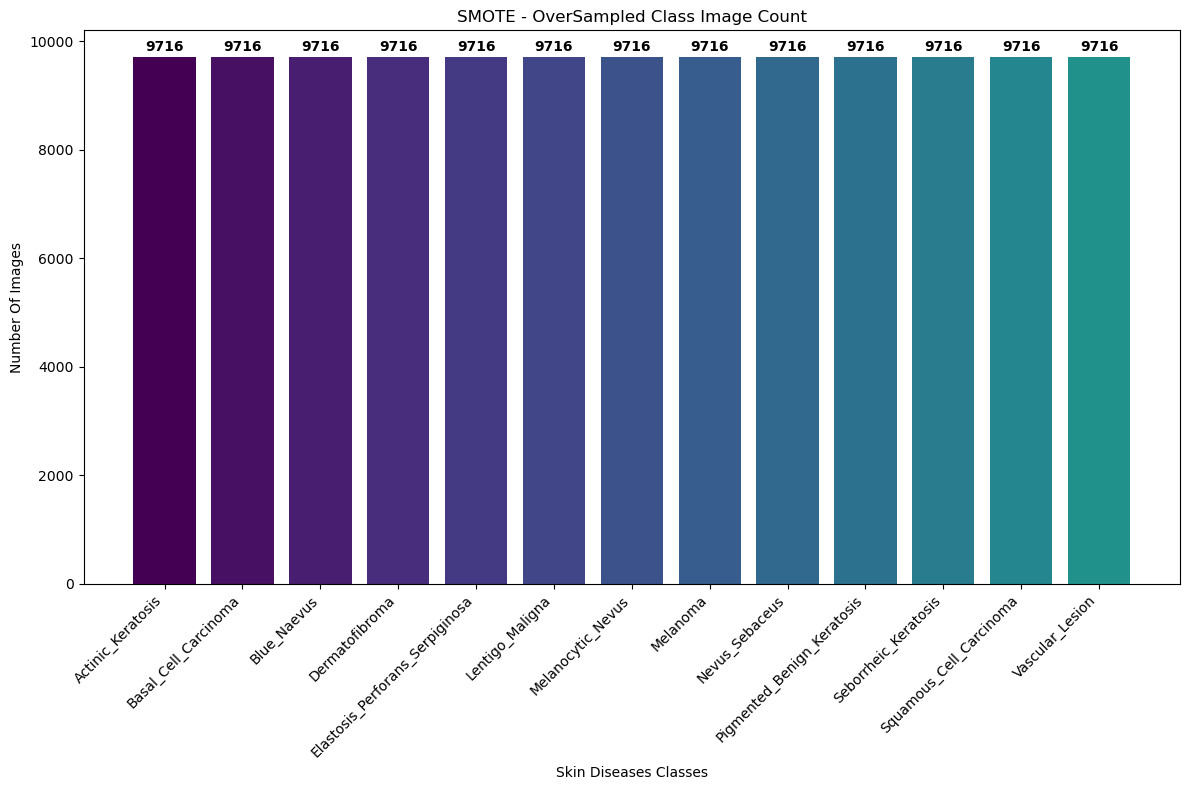

In [34]:
plt.figure(figsize=(12, 8))
bars = plt.bar(classes, counts, color=colors)

for i, (class_name, count) in enumerate(class_counts.items()):
    plt.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Skin Diseases Classes')
plt.ylabel('Number Of Images')
plt.title('SMOTE - OverSampled Class Image Count')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()